### BIG DATA ANALYTICS FOR BUSINESS **FINAL PROJECT**
NAMA :
1. ANANTA MAHARDIKA RACHMAT - 2602180821
2. RICHARD WIJAYA HARIANTO - 2602154930


In [ ]:
# Import library yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Membaca dataset
file_path = 'Toko Afan Clean.xlsx'  # Ganti dengan path file Anda jika perlu
df = pd.read_excel(file_path, sheet_name='Sheet1')

In [ ]:
# Konversi tipe data jika diperlukan
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

### **1. ANALISIS PENJUALAN HARIAN**
Analisis ini digunakan untuk melihat penjualan tiap harinya

Data setelah disortir (dalam juta):
   Hari Minggu        TOTAL  TOTAL_JUTA
4   45 SELASA  222586600.0  222.586600
2     45 RABU  194513550.0  194.513550
1    45 KAMIS  209276775.0  209.276775
0    45 JUMAT  145541000.0  145.541000
3    45 SABTU  246156400.0  246.156400
8    46 SENIN  174656400.0  174.656400
7   46 SELASA  107406100.0  107.406100
6     46 RABU  137700200.0  137.700200
5    46 KAMIS  149723275.0  149.723275


<ipython-input-20-e5d8a4d5dddd>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


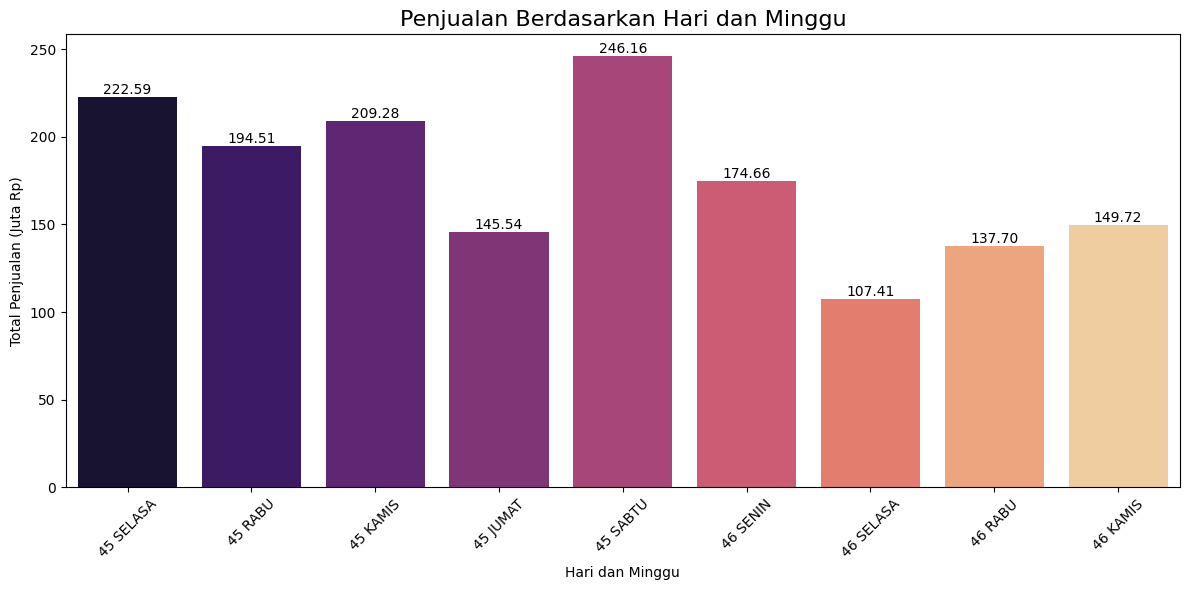

In [ ]:
# Menambahkan kolom 'Minggu' untuk membedakan minggu berdasarkan 'Tanggal'
df['Minggu'] = df['Tanggal'].dt.isocalendar().week

# Membuat label baru dengan kombinasi minggu dan hari
df['Hari Minggu'] = df['Minggu'].astype(str) + ' ' + df['HARI']

# Mengelompokkan data berdasarkan hari dan minggu
penjualan_harian = df.groupby('Hari Minggu')['TOTAL'].sum().reset_index()

# Menentukan urutan label manual berdasarkan data minggu 45 dan 46
urutan_hari = [
    '45 SELASA', '45 RABU', '45 KAMIS', '45 JUMAT', '45 SABTU',
    '46 SENIN', '46 SELASA', '46 RABU', '46 KAMIS'
]
penjualan_harian['Hari Minggu'] = pd.Categorical(
    penjualan_harian['Hari Minggu'], categories=urutan_hari, ordered=True
)
penjualan_harian = penjualan_harian.sort_values('Hari Minggu')

# Konversi nilai total penjualan ke dalam jutaan
penjualan_harian['TOTAL_JUTA'] = penjualan_harian['TOTAL'] / 1_000_000

# Debugging untuk memastikan data tersedia
print("Data setelah disortir (dalam juta):\n", penjualan_harian)

# Visualisasi bar chart dengan nilai pada setiap batang
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=penjualan_harian['Hari Minggu'],
    y=penjualan_harian['TOTAL_JUTA'],
    palette="magma"
)

# Menambahkan nilai di atas setiap batang
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge', fontsize=10)

# Menambahkan judul dan label
plt.title('Penjualan Berdasarkan Hari dan Minggu', fontsize=16)
plt.xlabel('Hari dan Minggu')
plt.ylabel('Total Penjualan (Juta Rp)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Penjualan berdasarkan hari (dalam juta):
 HARI
KAMIS     359.00005
RABU      332.21375
SELASA    329.99270
SABTU     246.15640
SENIN     174.65640
JUMAT     145.54100
Name: TOTAL, dtype: float64


<ipython-input-22-0707736bda69>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


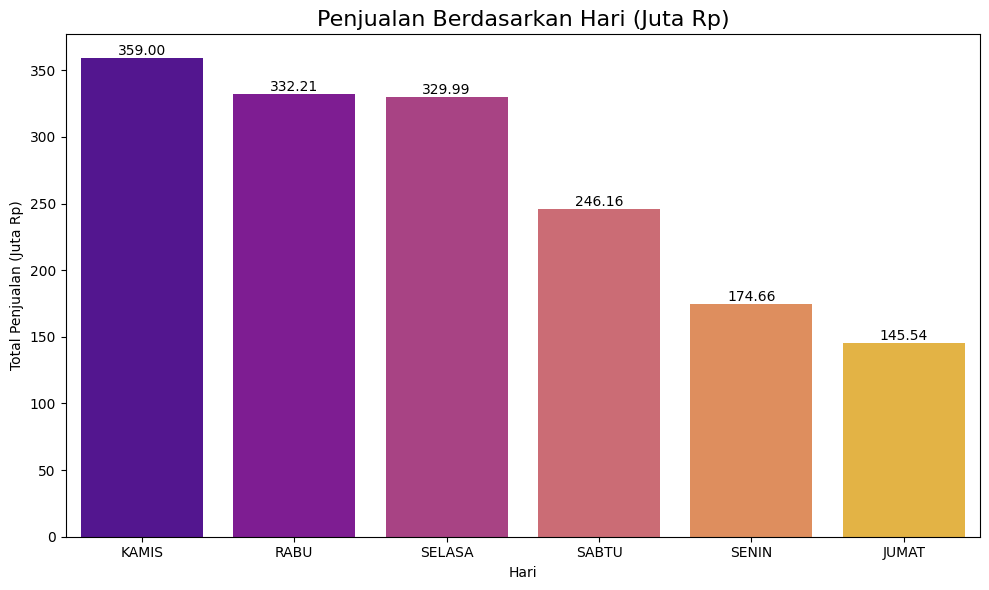

In [ ]:
# Gabungan Hari
penjualan_harian = df.groupby('HARI')['TOTAL'].sum().sort_values(ascending=False)

# Konversi nilai total penjualan ke dalam juta
penjualan_harian_juta = penjualan_harian / 1_000_000

# Debugging untuk memastikan data dalam juta
print("\nPenjualan berdasarkan hari (dalam juta):\n", penjualan_harian_juta)

# Visualisasi penjualan harian dalam juta
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=penjualan_harian_juta.index,
    y=penjualan_harian_juta.values,
    palette="plasma"
)

# Menambahkan nilai di atas setiap batang
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', label_type='edge', fontsize=10)

# Menambahkan judul dan label
plt.title('Penjualan Berdasarkan Hari (Juta Rp)', fontsize=16)
plt.xlabel('Hari')
plt.ylabel('Total Penjualan (Juta Rp)')
plt.tight_layout()
plt.show()

### **2. ANALISIS PRODUK TERLARIS**
Analisis ini digunakan untuk melihat top 10 produk terlaris dan top 10 produk paling tidak laris



10 Produk Terlaris:
 NAMA ITEM
TOPAS FILTER 12     7341.00
BIMOLI CURAH        6341.85
GULA PASIR          5745.50
TOPAS KRETEK 12     5443.00
SURYA 12 FILTER     4129.00
TOPAS FILTER 16     3620.00
GEO KRETEK          3181.00
GROW KRETEK         2434.00
SAMPOERNA AGA 10    2200.00
TEPUNG TEGU         2163.50
Name: JUMLAH, dtype: float64


<ipython-input-166-d4961fb07df2>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produk_terlaris.values, y=produk_terlaris.index, palette="coolwarm")


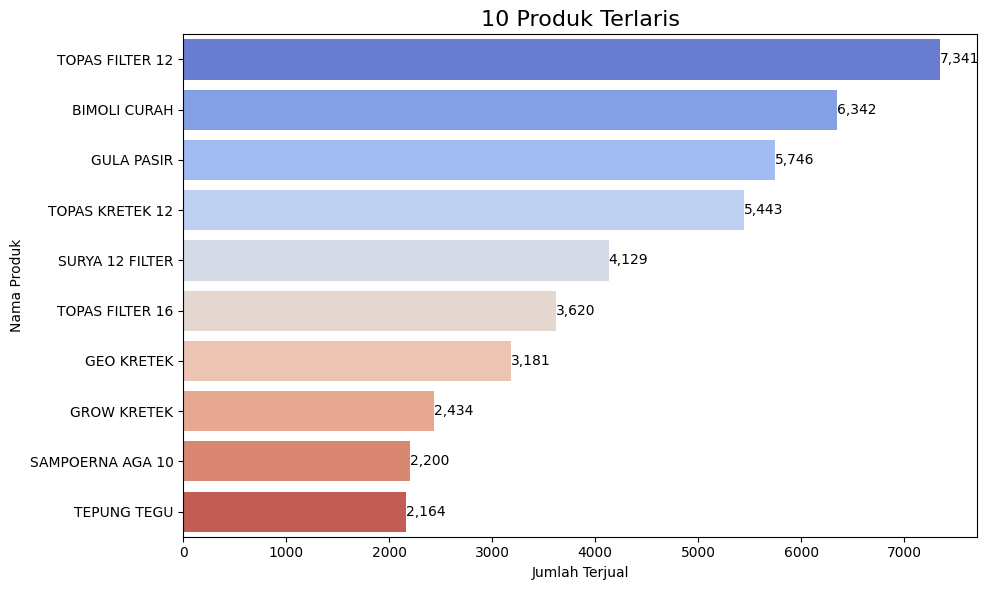

In [ ]:
# Produk Terlaris
produk_terlaris = df.groupby('NAMA ITEM')['JUMLAH'].sum().sort_values(ascending=False).head(10)
print("\n10 Produk Terlaris:\n", produk_terlaris)

# Visualisasi produk terlaris
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=produk_terlaris.values, y=produk_terlaris.index, palette="coolwarm")
plt.title('10 Produk Terlaris', fontsize=16)
plt.xlabel('Jumlah Terjual')
plt.ylabel('Nama Produk')

# Menambahkan nilai di atas setiap batang
for i in range(len(produk_terlaris)):
    ax.text(
        produk_terlaris.values[i] + 0.5,  # Posisi x (sedikit di samping nilai batang)
        i,  # Posisi y (berdasarkan index produk)
        f'{produk_terlaris.values[i]:,.0f}',  # Menampilkan angka tanpa desimal
        ha='left',  # Horizontal alignment di kiri
        va='center',  # Vertical alignment di tengah batang
        fontsize=10  # Ukuran font
    )

plt.tight_layout()
plt.show()


10 Produk Tidak Laris:
 NAMA ITEM
MISIS KIJANG            0.25
MERIS S                 0.50
KETAN HITAM             0.50
ATTACK EASY @1000       0.50
EKONOMI CEPOK 340 GR    1.00
NEXTAR                  1.00
DUA ANAK 10K            1.00
DAIA 1KG                1.00
PIXI STICK              1.00
CRICKET KRIKET          1.00
Name: JUMLAH, dtype: float64


<ipython-input-190-bc5ea6b5e50d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=produk_tidak_laris.values, y=produk_tidak_laris.index, palette="Blues_d")


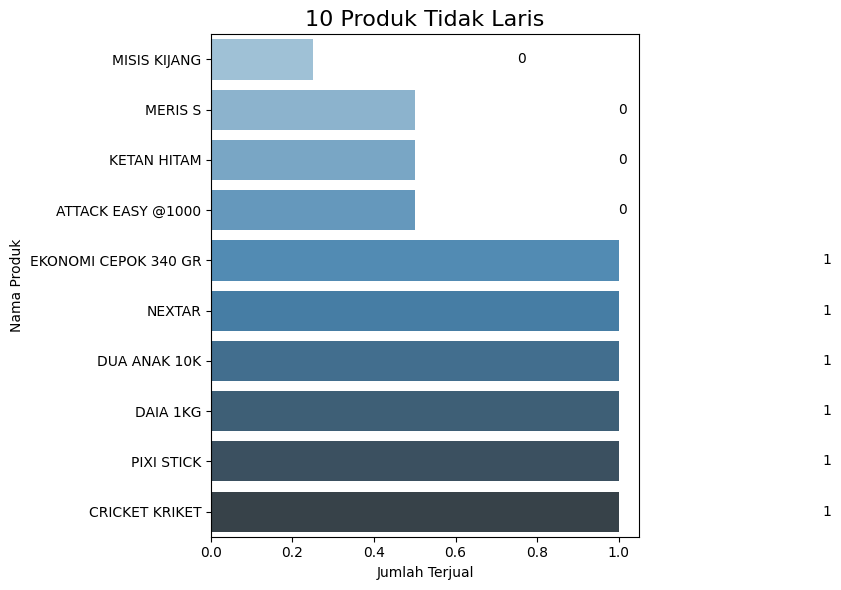

In [ ]:
# Produk Tidak Laris
produk_tidak_laris = df.groupby('NAMA ITEM')['JUMLAH'].sum().sort_values(ascending=True).head(10)
print("\n10 Produk Tidak Laris:\n", produk_tidak_laris)

# Visualisasi produk tidak laris
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=produk_tidak_laris.values, y=produk_tidak_laris.index, palette="Blues_d")
plt.title('10 Produk Tidak Laris', fontsize=16)
plt.xlabel('Jumlah Terjual')
plt.ylabel('Nama Produk')

# Menambahkan nilai di atas setiap batang
for i in range(len(produk_tidak_laris)):
    ax.text(
        produk_tidak_laris.values[i] + 0.5,  # Posisi x (sedikit di samping nilai batang)
        i,  # Posisi y (berdasarkan index produk)
        f'{produk_tidak_laris.values[i]:,.0f}',  # Menampilkan angka tanpa desimal
        ha='left',  # Horizontal alignment di kiri
        va='center',  # Vertical alignment di tengah batang
        fontsize=10  # Ukuran font
    )

plt.tight_layout()
plt.show()


### **3. PRODUK PENYUMBANG OMSET TERBESAR**
Pada bab ini dilakukan analisa untuk melihat produk yang menyumbangkan omset terbesar


10 Produk dengan Kontribusi Tertinggi terhadap Pendapatan (dalam juta):
 NAMA ITEM
TOPAS FILTER 12         108.0254
SURYA 12 FILTER          95.3799
BIMOLI CURAH             87.8339
GULA PASIR               86.1825
TOPAS FILTER 16          71.3140
HAPPY 25K                64.7570
BERAS MACAN 5K           63.5850
HAPPY 5 KG               54.7300
TOPAS KRETEK 12          41.9111
234 REFILL HITAM DSB     33.3312
Name: TOTAL, dtype: float64


<ipython-input-167-d0e1dc30a9d6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=total_produk_juta.index, y=total_produk_juta.values, palette="viridis")


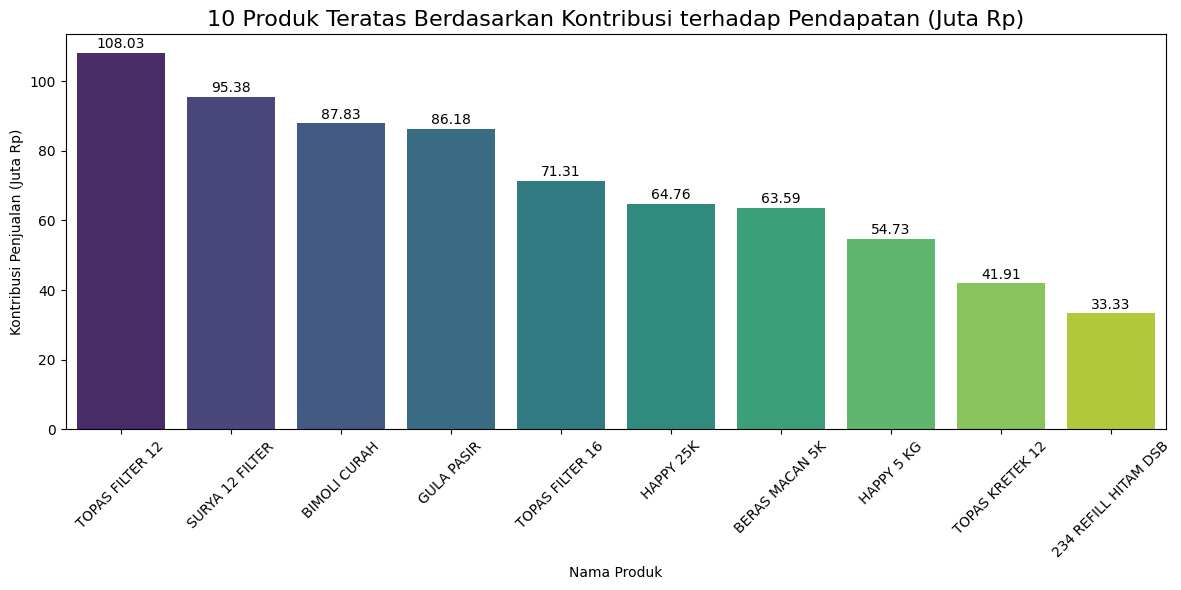

In [ ]:
# Menghitung total penjualan per produk
total_produk = df.groupby('NAMA ITEM')['TOTAL'].sum().sort_values(ascending=False).head(10)

# Konversi total penjualan per produk ke dalam juta
total_produk_juta = total_produk / 1_000_000

# Debugging untuk memastikan data dalam juta
print("\n10 Produk dengan Kontribusi Tertinggi terhadap Pendapatan (dalam juta):\n", total_produk_juta)

# Visualisasi kontribusi produk dengan bar chart dan satuan juta
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=total_produk_juta.index, y=total_produk_juta.values, palette="viridis")
plt.title('10 Produk Teratas Berdasarkan Kontribusi terhadap Pendapatan (Juta Rp)', fontsize=16)
plt.xlabel('Nama Produk')
plt.ylabel('Kontribusi Penjualan (Juta Rp)')
plt.xticks(rotation=45)

# Menambahkan nilai di atas setiap batang
for i in range(len(total_produk_juta)):
    ax.text(
        i,  # Posisi x (berdasarkan index)
        total_produk_juta.values[i] + 0.5,  # Posisi y (sedikit di atas nilai batang)
        f'{total_produk_juta.values[i]:,.2f}',  # Menampilkan angka dengan format dua desimal
        ha='center',  # Horizontal alignment di tengah
        va='bottom',  # Vertical alignment di atas batang
        fontsize=10  # Ukuran font
    )

plt.tight_layout()
plt.show()


### **4. TOP 10 PELANGGAN DENGAN PENYUMBANG OMSET TERBESAR**
Analisa ini digunakan untuk melihat top 10 pelanggan dengan pembelian terbesar


10 Pelanggan dengan Penjualan Tertinggi (dalam juta):
 Nama
GENERAL    162.70240
DINI        59.29340
SADI        51.31745
SITI        42.59610
SUTO        35.96000
TIYAH       30.66600
DIFA        30.64470
SAIFUL      27.55580
INDAH       26.07435
OSCAR       22.70690
Name: TOTAL, dtype: float64


<ipython-input-168-958fa38ecdfc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=penjualan_pelanggan_juta.values, y=penjualan_pelanggan_juta.index, palette="autumn")


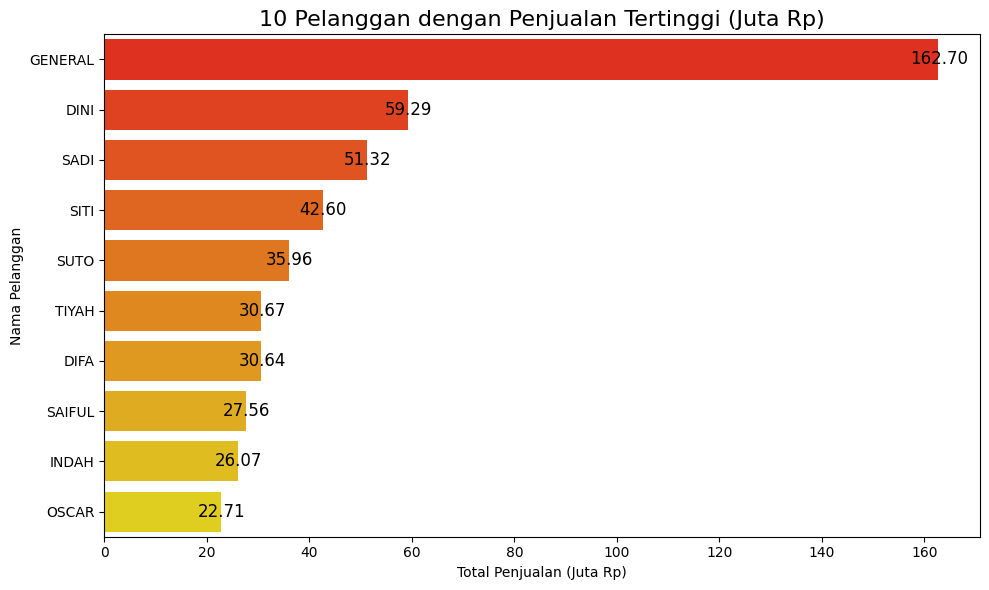

In [ ]:
penjualan_pelanggan = df.groupby('Nama')['TOTAL'].sum().sort_values(ascending=False).head(10)

# Konversi nilai total penjualan ke dalam juta
penjualan_pelanggan_juta = penjualan_pelanggan / 1_000_000

print("\n10 Pelanggan dengan Penjualan Tertinggi (dalam juta):\n", penjualan_pelanggan_juta)

# Visualisasi penjualan pelanggan dalam juta
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=penjualan_pelanggan_juta.values, y=penjualan_pelanggan_juta.index, palette="autumn")
plt.title('10 Pelanggan dengan Penjualan Tertinggi (Juta Rp)', fontsize=16)
plt.xlabel('Total Penjualan (Juta Rp)')
plt.ylabel('Nama Pelanggan')

# Menambahkan nilai di atas setiap batang
for i in range(len(penjualan_pelanggan_juta)):
    ax.text(
        penjualan_pelanggan_juta.values[i] + 0.1,  # Posisi x (sedikit di samping nilai batang)
        i,  # Posisi y (berdasarkan index pelanggan)
        f'{penjualan_pelanggan_juta.values[i]:,.2f}',  # Menampilkan angka dalam format juta dengan 2 desimal
        ha='center',  # Horizontal alignment
        va='center',  # Vertical alignment
        fontsize=12,  # Ukuran font
        color='black',  # Warna teks
    )

# Mengatur layout agar tidak ada yang terpotong
plt.tight_layout()

plt.show()


### **5. TIME SERIES PENJUALAN CV. AVAN JAYA JEMBER INDO**
Pada analisa ini dilakukan visualisasi untuk melihat perkembangan (naik-turun) penjualan tiap harinya

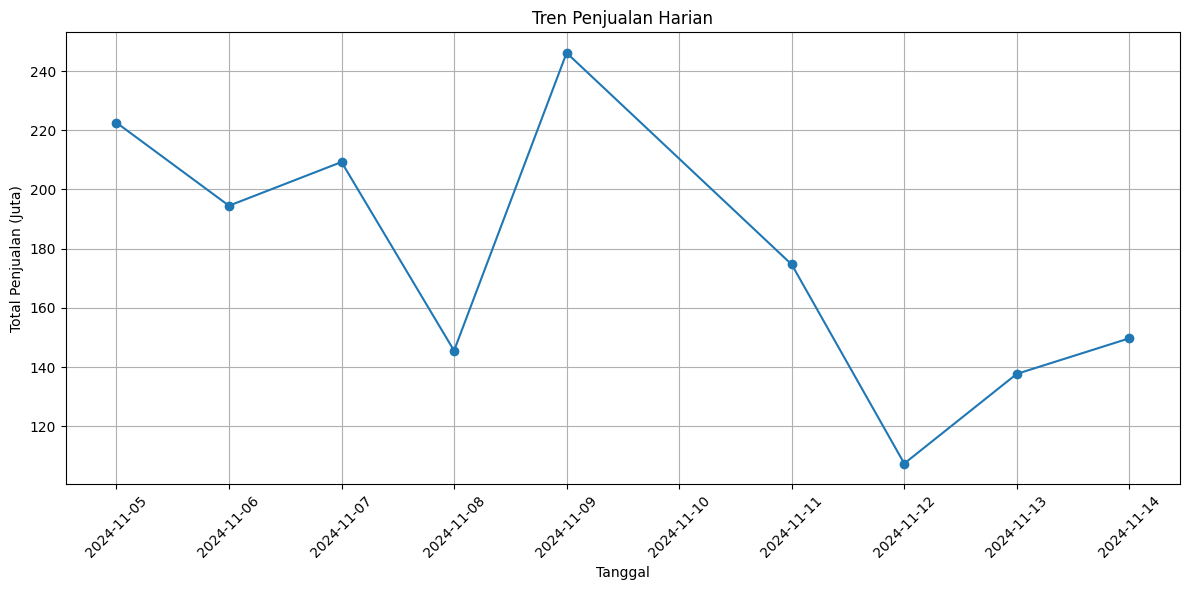

In [ ]:
# Mengelompokkan data berdasarkan tanggal dan menghitung total penjualan per hari
daily_sales = df.groupby('Tanggal')['TOTAL'].sum().reset_index()

# Mengubah total penjualan ke dalam satuan juta
daily_sales['TOTAL_JUTA'] = daily_sales['TOTAL'] / 1_000_000

# Membuat visualisasi tren penjualan harian
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['Tanggal'], daily_sales['TOTAL_JUTA'], marker='o', linestyle='-', color='tab:blue')
plt.title('Tren Penjualan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan (Juta)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Menampilkan plot
plt.show()


### **6. CUSTOMER SEGMENTATION**
Pada bab ini dilakukan analisa untuk membagi customer kedalam 3 segmen yaitu pembeli yang sesekali berbelanja di CV Afan Jaya Jember Indo, pembeli yang hanya membeli sekali saja, dan pembeli yang loyal

<ipython-input-142-426cdce3cdc9>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Set2')


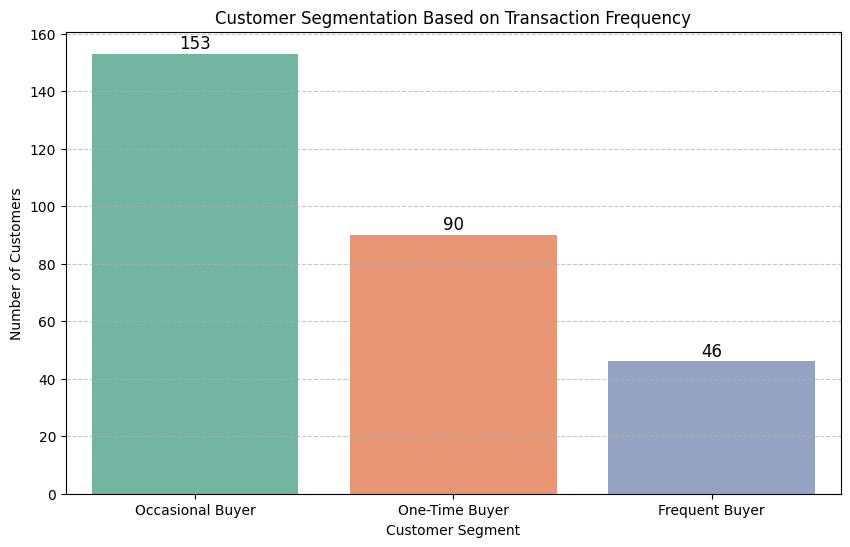

In [ ]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================
# 1. Menghitung Jumlah Transaksi per Pelanggan
# ============================================

transaction_count = df.groupby('Nama')['No. Transaksi'].nunique().reset_index()
transaction_count.columns = ['Nama', 'Transaction_Count']

# ============================================
# 2. Mengelompokkan Pelanggan Berdasarkan Frekuensi
# ============================================

def categorize_customer(count):
    if count == 1:
        return 'One-Time Buyer'
    elif 2 <= count <= 5:
        return 'Occasional Buyer'
    else:
        return 'Frequent Buyer'

transaction_count['Segment'] = transaction_count['Transaction_Count'].apply(categorize_customer)

# ============================================
# 3. Visualisasi Distribusi Segmen Pelanggan
# ============================================

segment_counts = transaction_count['Segment'].value_counts()

# Visualisasi distribusi segmen pelanggan dengan angka di atas batang
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=segment_counts.index, y=segment_counts.values, palette='Set2')

# Menambahkan angka di atas setiap batang
for i, value in enumerate(segment_counts.values):
    ax.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=12)

plt.title('Customer Segmentation Based on Transaction Frequency')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **7. KORELASI ANTARA JUMLAH PRODUK YANG DIJUAL DENGAN OMSET**
Analisa ini digunakan untuk melihat korelasi antara jumlah produk yang dijual dengan omset

Korelasi antara Jumlah Produk yang Dijual dan Omset: 0.76


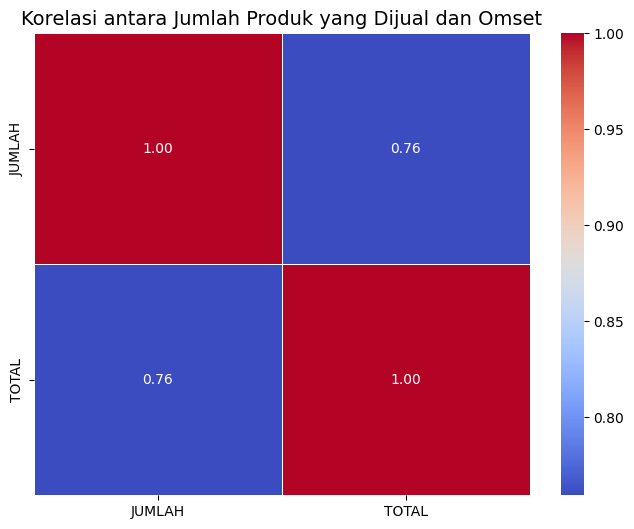

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan data sudah bersih dan siap digunakan
df_encoded = df.copy()

# Mengganti NaN dengan nilai rata-rata pada kolom yang relevan
df_encoded['JUMLAH'] = df_encoded['JUMLAH'].fillna(df_encoded['JUMLAH'].mean())
df_encoded['TOTAL'] = df_encoded['TOTAL'].fillna(df_encoded['TOTAL'].mean())
df_encoded['HARI'] = df_encoded['HARI'].fillna(df_encoded['HARI'].mode()[0])  # Ganti NaN pada hari dengan modus

# ============================================
# 1. Korelasi antara Jumlah Produk yang Dijual dan Omset
# ============================================

# Menghitung korelasi Pearson antara jumlah produk yang dijual ('JUMLAH') dan omset ('TOTAL')
correlation_sales_revenue = df_encoded['JUMLAH'].corr(df_encoded['TOTAL'])

# Menampilkan hasil korelasi
print(f"Korelasi antara Jumlah Produk yang Dijual dan Omset: {correlation_sales_revenue:.2f}")

# ============================================
# Visualisasi Korelasi
# ============================================

# 1. Korelasi antara Jumlah Produk yang Dijual dan Omset
plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[['JUMLAH', 'TOTAL']].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasi antara Jumlah Produk yang Dijual dan Omset', fontsize=14)
plt.show()

### **8. POPULARITY AND REVENUE PREDICTION USING NAIVE BAYES**
Metode machine learning atau naive bayes ini digunakan untuk memprediksi popularity dan pendapatan

In [ ]:
# Import library yang diperlukan
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# --- Persiapan Data ---
df_encoded = df.copy()

# Hitung rata-rata JUMLAH dan TOTAL untuk menentukan kategori
mean_jumlah = df_encoded['JUMLAH'].mean()
mean_total = df_encoded['TOTAL'].mean()

# Fungsi untuk mengkategorikan item berdasarkan popularitas
def categorize_popularity(value):
    return 'populer' if value >= mean_jumlah else 'tidak populer'

# Fungsi untuk mengkategorikan item berdasarkan pendapatan
def categorize_revenue(value):
    return 'tinggi' if value >= mean_total else 'rendah'

# Tambahkan kolom kategori
df_encoded['Kategori_Popularitas'] = df_encoded['JUMLAH'].apply(categorize_popularity)
df_encoded['Kategori_Pendapatan'] = df_encoded['TOTAL'].apply(categorize_revenue)

# Pilih fitur input (X) dan target (y) untuk kedua kasus
features = ['JUMLAH', 'HARGA SATUAN']

# --- Kasus 1: Prediksi Popularitas ---
X_popularity = df_encoded[features]
y_popularity = df_encoded['Kategori_Popularitas']

# Split data
X_train_pop, X_test_pop, y_train_pop, y_test_pop = train_test_split(
    X_popularity, y_popularity, test_size=0.2, random_state=42
)

# Latih model Naive Bayes
nb_model_pop = GaussianNB()
nb_model_pop.fit(X_train_pop, y_train_pop)

# Prediksi dan evaluasi
y_pred_pop = nb_model_pop.predict(X_test_pop)
print("Akurasi Model Prediksi Popularitas:", accuracy_score(y_test_pop, y_pred_pop))
print("\nLaporan Klasifikasi Popularitas:\n", classification_report(y_test_pop, y_pred_pop))

# --- Kasus 2: Prediksi Pendapatan ---
X_revenue = df_encoded[features]
y_revenue = df_encoded['Kategori_Pendapatan']

# Split data
X_train_rev, X_test_rev, y_train_rev, y_test_rev = train_test_split(
    X_revenue, y_revenue, test_size=0.2, random_state=42
)

# Latih model Naive Bayes
nb_model_rev = GaussianNB()
nb_model_rev.fit(X_train_rev, y_train_rev)

# Prediksi dan evaluasi
y_pred_rev = nb_model_rev.predict(X_test_rev)
print("Akurasi Model Prediksi Pendapatan:", accuracy_score(y_test_rev, y_pred_rev))
print("\nLaporan Klasifikasi Pendapatan:\n", classification_report(y_test_rev, y_pred_rev))

# --- Analisis Item ---
# Item populer
item_populer = df_encoded[df_encoded['Kategori_Popularitas'] == 'populer']
print("\nItem Populer:\n", item_populer[['NAMA ITEM', 'JUMLAH']].sort_values(by='JUMLAH', ascending=False))

# Item dengan pendapatan tertinggi
item_pendapatan = df_encoded[df_encoded['Kategori_Pendapatan'] == 'tinggi']
print("\nItem dengan Pendapatan Tertinggi:\n", item_pendapatan[['NAMA ITEM', 'TOTAL']].sort_values(by='TOTAL', ascending=False))


Akurasi Model Prediksi Popularitas: 0.9929460580912863

Laporan Klasifikasi Popularitas:
                precision    recall  f1-score   support

      populer       0.99      0.99      0.99       835
tidak populer       0.99      0.99      0.99      1575

     accuracy                           0.99      2410
    macro avg       0.99      0.99      0.99      2410
 weighted avg       0.99      0.99      0.99      2410

Akurasi Model Prediksi Pendapatan: 0.7954356846473029

Laporan Klasifikasi Pendapatan:
               precision    recall  f1-score   support

      rendah       0.81      0.95      0.87      1794
      tinggi       0.71      0.33      0.45       616

    accuracy                           0.80      2410
   macro avg       0.76      0.64      0.66      2410
weighted avg       0.78      0.80      0.77      2410


Item Populer:
                  NAMA ITEM  JUMLAH
734        TOPAS FILTER 16  1000.0
9338               POP MIE   600.0
6684  234 REFILL HITAM DSB   500.0
6422  

<ipython-input-145-354ef7f9f4d2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=models, y=accuracies_percent, palette='Set2')


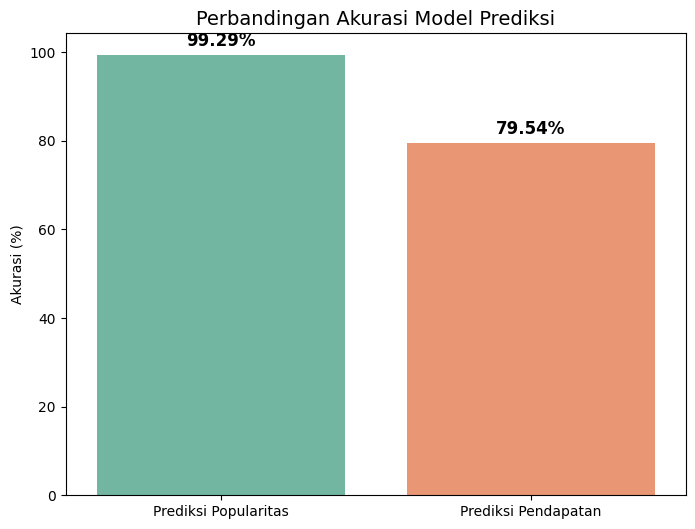

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung akurasi dalam persen
accuracies_percent = [accuracy_score(y_test_pop, y_pred_pop) * 100, accuracy_score(y_test_rev, y_pred_rev) * 100]

# Visualisasi Bar Chart
plt.figure(figsize=(8, 6))
ax = sns.barplot(x=models, y=accuracies_percent, palette='Set2')

# Menambahkan angka di atas batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', fontweight='bold', xytext=(0, 10),
                textcoords='offset points')

plt.title('Perbandingan Akurasi Model Prediksi', fontsize=14)
plt.ylabel('Akurasi (%)')
plt.show()


### **9. FORECASTING PENJUALAN MENGGUNAKAN PROPHET**
Forecasting ini menggunakan algoritma prophet yang berfungsi untuk memprediksi penjualan kedepannya

In [ ]:
!pip install prophet

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o3txngf/rd45pbxw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0o3txngf/v46jqab2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94197', 'data', 'file=/tmp/tmp0o3txngf/rd45pbxw.json', 'init=/tmp/tmp0o3txngf/v46jqab2.json', 'output', 'file=/tmp/tmp0o3txngf/prophet_model_dw2ydw9/prophet_model-20241210131724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:17:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:17:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


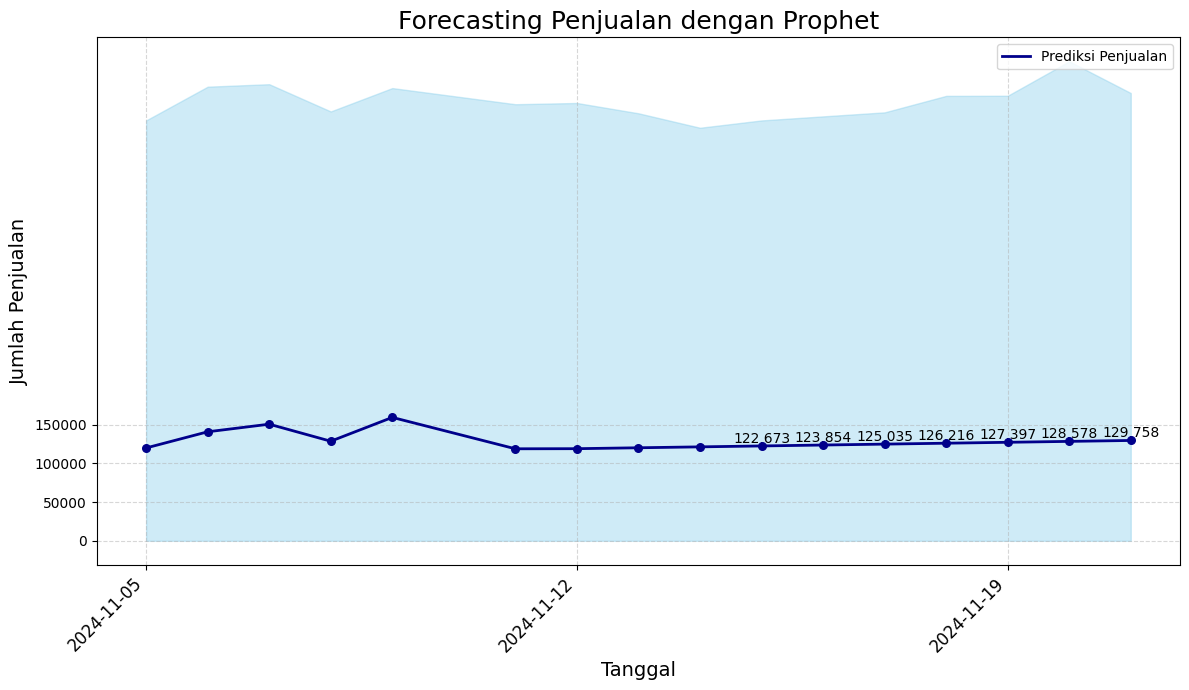

,ds,yhat,yhat_lower,yhat_upper
9,2024-11-15,122673.891451,0.0,543722.996560
10,2024-11-16,123854.737907,0.0,548961.249967
11,2024-11-17,125035.584362,0.0,554164.234656
12,2024-11-18,126216.430818,0.0,575479.752684
13,2024-11-19,127397.277273,0.0,575632.186415
14,2024-11-20,128578.123729,0.0,620210.090409
15,2024-11-21,129758.970184,0.0,579172.444406


In [ ]:
# Import library yang diperlukan
from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Pastikan data sudah terurut berdasarkan tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Pilih kolom yang relevan untuk Prophet (Tanggal dan Total Penjualan)
df_encoded = df[['Tanggal', 'TOTAL']]  # Sesuaikan dengan kolom yang relevan

# Membuat dan melatih model Prophet dengan komponen musiman
df_encoded = df_encoded.rename(columns={'Tanggal': 'ds', 'TOTAL': 'y'})  # Sesuaikan kolom untuk Prophet
model_prophet = Prophet(
    yearly_seasonality=False,  # Menambahkan komponen musiman tahunan
    weekly_seasonality=False,  # Menambahkan komponen musiman mingguan
    daily_seasonality=True,    # Menghentikan komponen musiman harian jika tidak diperlukan
    interval_width=0.80        # Menurunkan lebar interval untuk prediksi yang lebih ketat
)

model_prophet.fit(df_encoded)

# Membuat dataframe untuk prediksi 7 hari ke depan
future = model_prophet.make_future_dataframe(periods=7)

# Forecasting
forecast_prophet = model_prophet.predict(future)

# Menangani prediksi negatif dengan mengganti nilai yang lebih rendah dari 0 menjadi 0
forecast_prophet['yhat'] = forecast_prophet['yhat'].clip(lower=0)
forecast_prophet['yhat_lower'] = forecast_prophet['yhat_lower'].clip(lower=0)
forecast_prophet['yhat_upper'] = forecast_prophet['yhat_upper'].clip(lower=0)

# Visualisasi hasil forecast dengan grafik time series yang lebih menarik
plt.figure(figsize=(12, 7))

# Plot garis prediksi
plt.plot(forecast_prophet['ds'], forecast_prophet['yhat'], label='Prediksi Penjualan', color='darkblue', linestyle='-', linewidth=2)

# Menambahkan area interval kepercayaan
plt.fill_between(forecast_prophet['ds'], forecast_prophet['yhat_lower'], forecast_prophet['yhat_upper'], color='skyblue', alpha=0.4)

# Menambahkan titik-titik pada garis untuk menunjukkan prediksi yang lebih jelas
plt.scatter(forecast_prophet['ds'], forecast_prophet['yhat'], color='darkblue', s=30, zorder=5)

# Menambahkan judul dan label sumbu
plt.title('Forecasting Penjualan dengan Prophet', fontsize=18)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Penjualan', fontsize=14)

# Format tanggal pada sumbu X agar lebih rapi
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.xticks(rotation=45, ha="right", fontsize=12)

# Mengubah sumbu Y menjadi bilangan bulat
plt.yticks(range(0, int(forecast_prophet['yhat'].max()) + 10000, 50000))

# Menambahkan grid dan mengatur tampilan grid agar lebih ringan
plt.grid(True, linestyle='--', alpha=0.5)

# Menambahkan anotasi untuk menunjukkan nilai prediksi untuk 7 hari ke depan
for i, row in forecast_prophet.tail(7).iterrows():
    plt.text(row['ds'], row['yhat'], f'{int(row["yhat"]):,}', color='black', ha='center', va='bottom', fontsize=10)

# Menampilkan legend
plt.legend()

# Menampilkan grafik
plt.tight_layout()
plt.show()

# Menampilkan hasil prediksi untuk 7 hari ke depan
forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)


### **10. PREDIKSI TOP 10 PRODUK TERLARIS 7 HARI KEDEPAN**
Menggunakan metode machine learning yaitu linear regression untuk memprediksi top 10 produk yang paling laris dalam 7 hari kedepan


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature n


10 Produk Terlaris (Prediksi 7 Hari Ke Depan):
 NAMA ITEM
BIMOLI CURAH        4258.435811
TOPAS KRETEK 12     4037.971619
GULA PASIR          3513.413514
POP MIE             2818.846154
SURYA 12 FILTER     1925.047297
SAMPOERNA AGA 10    1861.318919
TEPUNG CAKRA        1653.031081
GROW KRETEK         1637.612162
MAMA LEMON @1000    1430.352459
TOPAS FILTER 12     1346.194595
Name: Prediksi Penjualan, dtype: float64


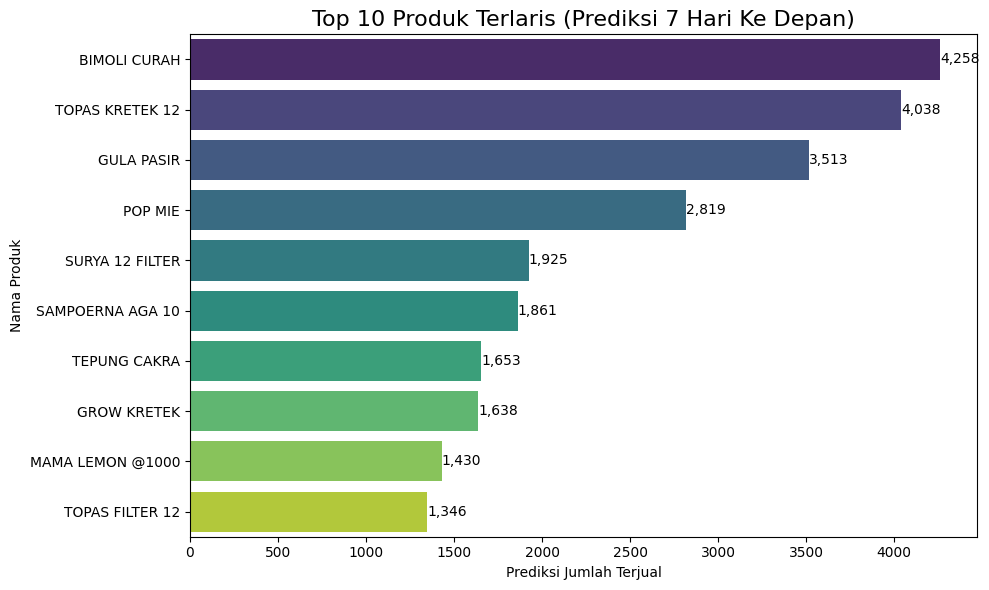

In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta

# Pastikan data sudah terurut berdasarkan tanggal
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Agregasi penjualan per produk per tanggal
df_aggregated = df.groupby(['Tanggal', 'NAMA ITEM'])['JUMLAH'].sum().reset_index()

# List untuk menyimpan prediksi
predictions = []

# Model Linear Regression
model = LinearRegression()

# Memprediksi untuk setiap produk
for product in df_aggregated['NAMA ITEM'].unique():
    # Filter data untuk produk tertentu
    product_data = df_aggregated[df_aggregated['NAMA ITEM'] == product].copy()  # Menghindari SettingWithCopyWarning

    # Mengubah tanggal menjadi ordinal untuk prediksi
    product_data.loc[:, 'Tanggal_ordinal'] = product_data['Tanggal'].apply(lambda x: x.toordinal())

    # Fitting model Linear Regression
    X = product_data[['Tanggal_ordinal']]  # Fitur: tanggal (ordinal)
    y = product_data['JUMLAH']  # Target: jumlah penjualan

    model.fit(X, y)

    # Membuat prediksi untuk 7 hari ke depan
    last_date = product_data['Tanggal'].max()  # Ambil tanggal terakhir dalam data
    future_dates = [last_date + timedelta(days=i) for i in range(1, 8)]
    future_dates_ordinal = [date.toordinal() for date in future_dates]

    # Prediksi jumlah penjualan untuk 7 hari ke depan
    future_predictions = model.predict(np.array(future_dates_ordinal).reshape(-1, 1))

    # Simpan hasil prediksi ke dalam list
    for i, date in enumerate(future_dates):
        predictions.append({
            'NAMA ITEM': product,
            'Tanggal': date,
            'Prediksi Penjualan': future_predictions[i]
        })

# Mengonversi hasil prediksi ke dalam dataframe
predictions_df = pd.DataFrame(predictions)

# Menghitung total prediksi untuk 7 hari ke depan
total_predictions = predictions_df.groupby('NAMA ITEM')['Prediksi Penjualan'].sum().sort_values(ascending=False).head(10)

# Menampilkan 10 produk dengan prediksi penjualan tertinggi
print("\n10 Produk Terlaris (Prediksi 7 Hari Ke Depan):\n", total_predictions)

# Visualisasi produk terlaris
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=total_predictions.values, y=total_predictions.index, palette="viridis")
plt.title('Top 10 Produk Terlaris (Prediksi 7 Hari Ke Depan)', fontsize=16)
plt.xlabel('Prediksi Jumlah Terjual')
plt.ylabel('Nama Produk')

# Menambahkan nilai di atas setiap batang
for i in range(len(total_predictions)):
    ax.text(
        total_predictions.values[i] + 0.5,  # Posisi x (sedikit di samping nilai batang)
        i,  # Posisi y (berdasarkan index produk)
        f'{total_predictions.values[i]:,.0f}',  # Menampilkan angka tanpa desimal
        ha='left',  # Horizontal alignment di kiri
        va='center',  # Vertical alignment di tengah batang
        fontsize=10  # Ukuran font
    )

plt.tight_layout()
plt.show()

